In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('synth_temp.csv')
df=df.loc[df.Year>1901]
df

AverageTemperature  Year
366            16.973653  1902
367            17.181773  1903
368            17.436933  1904
369            17.688948  1905
370            17.811166  1906
...                  ...   ...
1945           19.573018  2006
1946           19.975516  2007
1947           19.617621  2008
1948           19.980084  2009
1949           20.482839  2010

[1452 rows x 2 columns]

In [3]:
df_group_year = df.groupby(['Year']).agg({'AverageTemperature' : 'mean'})

In [4]:
df_group_year['Year']=df_group_year.index
df_group_year=df_group_year.rename(columns={'AverageTemperature':'AvTemp'})
df_group_year['Year2']=df_group_year['Year']**2
print(df_group_year.head())
print(df_group_year.tail())

         AvTemp  Year    Year2
Year                          
1902  17.438122  1902  3617604
1903  17.375456  1903  3621409
1904  17.558674  1904  3625216
1905  17.740646  1905  3629025
1906  17.501770  1906  3632836
         AvTemp  Year    Year2
Year                          
2006  19.827744  2006  4024036
2007  19.694244  2007  4028049
2008  19.793876  2008  4032064
2009  19.884571  2009  4036081
2010  19.903760  2010  4040100


In [5]:
linear_model=LinearRegression(fit_intercept=True)
linear_model.fit(df_group_year.loc[:, ['Year', 'Year2']], df_group_year.AvTemp)
print('model coefficients = ', linear_model.coef_)
print('model intercept = ', linear_model.intercept_)
r2=linear_model.score(df_group_year.loc[:, ['Year', 'Year2']], df_group_year.AvTemp)
print('r squared = ', r2)

model coefficients =  [-1.07795273e+00  2.81467072e-04]
model intercept =  1049.5159662796245
r squared =  0.96274721099461


In [6]:
# generate predictions for visualization
pred_X=df_group_year.loc[:, ['Year', 'Year2']]
pred_Y=linear_model.predict(pred_X)
# generate predictions for the next 10 years
pred_X_future=pd.DataFrame(list(range(2011, 2021))).rename(columns={0:'Year'})
pred_X_future['Year2']=pred_X_future['Year']**2
pred_Y_future=linear_model.predict(pred_X_future)

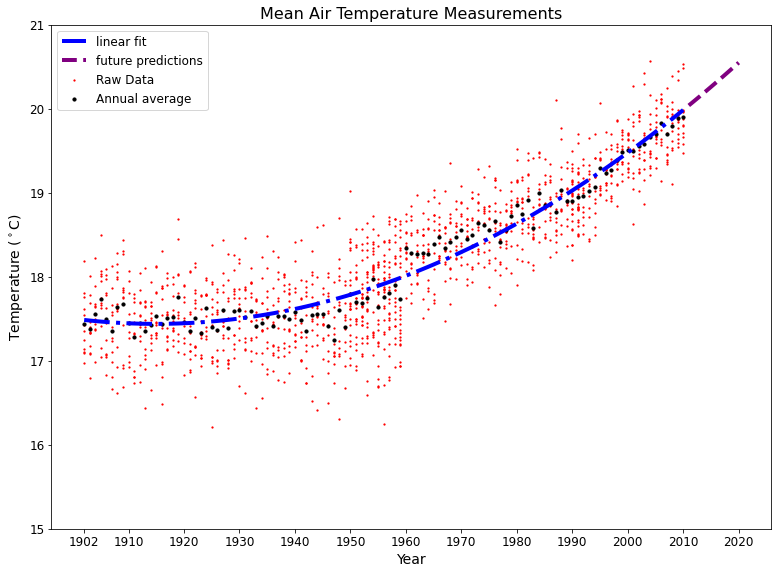

In [7]:
fig=plt.figure(figsize=(10, 7))
ax=fig.add_axes([1, 1, 1, 1])
#Raw data
raw_plot_data=df
ax.scatter(raw_plot_data.Year, raw_plot_data.AverageTemperature, label='Raw Data', c='red', s=1.5)
#Annual average 
ax.scatter(df_group_year.Year, df_group_year.AvTemp, label='Annual average', c='k', s=10)
#linear fit
ax.plot(pred_X.Year, pred_Y, c="blue", linestyle='-.', linewidth=4, label='linear fit')
#Visualize the future predictions
ax.plot(pred_X_future.Year, pred_Y_future, c="purple", linestyle='--', linewidth=4, label='future predictions')
ax.set_title('Mean Air Temperature Measurements', fontsize=16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2021, 10))
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()